In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import plotly.express as px
from datetime import datetime
import math
dir='C:\\Users\\juank\\Documents\\Pruebas\\ATENEA'
os.chdir(dir)

sns.set_theme(style='white')
sns.set_context("notebook")

# **1. Caracterización de IES**

## 1.1. Bases de datos del SNIES 
1.Instituciones

In [104]:
IES=pd.read_excel('Instituciones.xlsx')

Filtra por Bogotá, que esten activas y que se hayan creado en el 2022 o antes

In [132]:
IES_B=IES[(IES.DEPARTAMENTO_DOMICILIO=='Bogotá, D.C.')&(pd.to_datetime(IES['FECHA_NORMA_DE_CREACIÓN']).dt.year<=2022)&(IES['ESTADO']=='Activa')]
N_ies=IES_B.shape[0]

2. Programas creados en el 2022 o antes

In [106]:
prog=pd.read_excel('Programas.xlsx')
prog=prog[pd.to_datetime(prog['FECHA_DE_REGISTRO_EN_SNIES']).dt.year<=2022]
prog.index=range(prog.shape[0])

Se escribe una función para buscar las IES de Bogotá descritas anteriormente en *IES_B*

In [107]:
def ies_index(IES,data,col):
    ind=[]
    for i in range(data.shape[0]):
        if data[col][i] in IES:
            ind.append(i)
    return ind

Programas que ofrecen IES en Bogotá

In [108]:
ies=IES_B['CÓDIGO_INSTITUCIÓN'].tolist()
prog_B=prog.iloc[ies_index(ies,prog,'CÓDIGO_INSTITUCIÓN'),:]

3. Matriculados

In [143]:
matriculados=pd.read_excel('Matriculados.xlsx')[['CÓDIGO DE LA INSTITUCIÓN', 'IES_PADRE','SECTOR IES','IES ACREDITADA','CÓDIGO SNIES DEL PROGRAMA',
       'PROGRAMA ACADÉMICO', 'PROGRAMA ACREDITADO', 'ID NIVEL ACADÉMICO', 'NIVEL ACADÉMICO', 'ID NIVEL DE FORMACIÓN',
        'NIVEL DE FORMACIÓN','ID METODOLOGÍA', 'METODOLOGÍA', 'ÁREA DE CONOCIMIENTO', 'DESC CINE CAMPO AMPLIO', 
        'CÓDIGO DEL DEPARTAMENTO (PROGRAMA)','DEPARTAMENTO DE OFERTA DEL PROGRAMA','CÓDIGO DEL MUNICIPIO (PROGRAMA)', 
        'MUNICIPIO DE OFERTA DEL PROGRAMA', 'SEXO', 'SEMESTRE', 'MATRICULADOS']]
matriculados_=matriculados.groupby(['CÓDIGO DE LA INSTITUCIÓN', 'IES_PADRE','NIVEL ACADÉMICO','SEXO'],as_index=False).agg({'SECTOR IES':'first','MATRICULADOS':'sum'})

Matriculados en Bogotá

In [145]:
matriculados_b=matriculados_.iloc[ies_index(ies,matriculados_,'CÓDIGO DE LA INSTITUCIÓN'),:]

Hay 9 IES que no registran matriculados en la base consolidada de Matriculados de la SNIES 2022.

4. Docentes

In [113]:
docentes=pd.read_excel('Docentes.xlsx')[['Código de \nla Institución', 'IES PADRE','Sexo del\nDocente','Máximo nivel \nde formación\ndel docente',
                                         'NIVEL CINE ','Tiempo de dedicación\ndel Docente','Tipo de contrato\ndel Docente', 'Año','Semestre', 'No. de Docentes']]
docentes.columns=docentes.columns.str.replace('\n','')
docentes_=docentes.groupby(['Código de la Institución', 'IES PADRE', 'Sexo delDocente'],as_index=False).agg({'No. de Docentes':'sum'})

Docentes en IES de Bogotá

In [121]:
docentes_b=docentes_.iloc[ies_index(ies,docentes_,'Código de la Institución')]

Hay 8 IES que no registraron docentes en SNIES.

## 1.2. Analisis

1. Sector

In [183]:
Sec=IES_B['SECTOR'].value_counts()
for i in Sec.index:
    print(f'IES que son {i}: {Sec[i]} equivale {round((Sec[i]/N_ies)*100,2)}%')

IES que son Privado: 102 equivale 83.61%
IES que son Oficial: 20 equivale 16.39%


2. Natruraleza jurídicam, carécter académico y sector

a. Cantidad de IES

In [163]:
pd.crosstab(IES_B['CARÁCTER_ACADÉMICO'],IES_B['NATURALEZA_JURÍDICA'],margins=True,margins_name='Total')

NATURALEZA_JURÍDICA,Corporación,Fundación,Municipal,Nacional,Total
CARÁCTER_ACADÉMICO,,,,,
Institución Tecnológica,10,7,0,1,18
Institución Técnica Profesional,6,7,0,0,13
Institución Universitaria/Escuela Tecnológica,15,32,0,13,60
Universidad,11,14,1,5,31
Total,42,60,1,19,122


b. Porcentaje de IES

In [165]:
pd.crosstab(IES_B['CARÁCTER_ACADÉMICO'],IES_B['NATURALEZA_JURÍDICA'],normalize='all',margins=True,margins_name='Total')

NATURALEZA_JURÍDICA,Corporación,Fundación,Municipal,Nacional,Total
CARÁCTER_ACADÉMICO,,,,,
Institución Tecnológica,0.081967,0.057377,0.000000,0.008197,0.147541
Institución Técnica Profesional,0.049180,0.057377,0.000000,0.000000,0.106557
Institución Universitaria/Escuela Tecnológica,0.122951,0.262295,0.000000,0.106557,0.491803
Universidad,0.090164,0.114754,0.008197,0.040984,0.254098
Total,0.344262,0.491803,0.008197,0.155738,1.000000


Figura carécter académico por sector

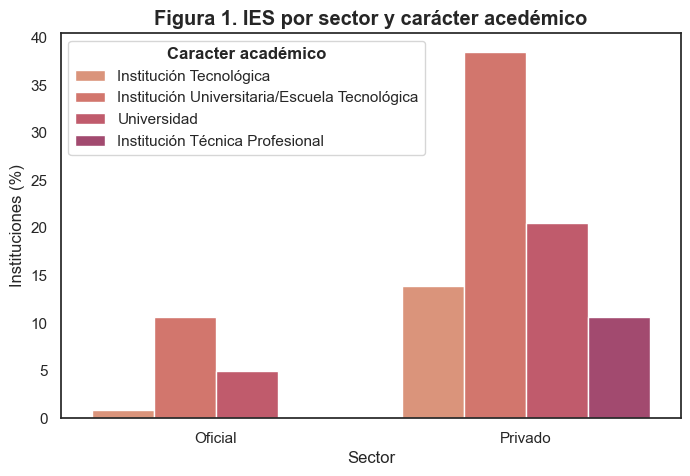

In [179]:
sect=IES_B.groupby(['SECTOR','CARÁCTER_ACADÉMICO'],as_index=False).agg({'CÓDIGO_INSTITUCIÓN':'count'})
sect['Porcentaje']=(sect['CÓDIGO_INSTITUCIÓN']/N_ies)*100

plt.figure(figsize=(8,5))
sns.barplot(sect,x='SECTOR',y='Porcentaje',hue=sect['CARÁCTER_ACADÉMICO'],palette=sns.color_palette("flare"))
plt.xlabel('Sector')
plt.ylabel('Instituciones (%)')
plt.title('Figura 1. IES por sector y carácter acedémico',weight= 'bold',size='large')
plt.legend(title='Caracter académico',title_fontproperties={'weight':'semibold'},loc=2)


3. Acreditación de alta calidad

In [180]:
cal=IES_B['ACREDITADA_ALTA_CALIDAD'].value_counts()
for i in cal.index:
    print(f'{i}: {round((cal[i]/N_ies)*100,2)}%')

N: 71.31%
S: 28.69%


Por sector y carácter

In [182]:
cal=IES_B[IES_B['ACREDITADA_ALTA_CALIDAD']=='S']
pd.crosstab([cal['SECTOR'],cal['CARÁCTER_ACADÉMICO']],cal['NATURALEZA_JURÍDICA'], margins='all', margins_name='Total')


NATURALEZA_JURÍDICA                                    Corporación  Fundación  \
SECTOR  CARÁCTER_ACADÉMICO                                                      
Oficial Institución Universitaria/Escuela Tecnológica            0          0   
        Universidad                                              0          0   
Privado Institución Universitaria/Escuela Tecnológica            1          6   
        Universidad                                              9         11   
Total                                                           10         17   

NATURALEZA_JURÍDICA                                    Municipal  Nacional  \
SECTOR  CARÁCTER_ACADÉMICO                                                   
Oficial Institución Universitaria/Escuela Tecnológica          0         2   
        Universidad                                            1         5   
Privado Institución Universitaria/Escuela Tecnológica          0         0   
        Universidad                                            0         0   
Total                                                          1         7   

NATURALEZA_JURÍDICA                                    Total  
SECTOR  CARÁCTER_ACADÉMICO                                    
Oficial Institución Universitaria/Escuela Tecnológica      2  
        Universidad                                        6  
Privado Institución Universitaria/Escuela Tecnológica      7  
        Universidad                                       20  
Total                                                     35

4. Programas académicos

Programas únicos

In [234]:
len(prog_B[prog_B['NIVEL_ACADÉMICO']=='Pregrado'].NOMBRE_DEL_PROGRAMA.unique())

2355

In [238]:
np=len(prog_B.NOMBRE_DEL_PROGRAMA.unique())
pre=len(prog_B[prog_B['NIVEL_ACADÉMICO']=='Pregrado'].NOMBRE_DEL_PROGRAMA.unique())
pos=len(prog_B[prog_B['NIVEL_ACADÉMICO']=='Posgrado'].NOMBRE_DEL_PROGRAMA.unique())
print(f'Hay {np} programas académicos diferentes, de los cuales {round((pre/np)*100,1)}% son de pregrado y {round((pos/np)*100,1)}% son de posgrado')

Hay 5324 programas académicos diferentes, de los cuales 44.2% son de pregrado y 55.8% son de posgrado


Programas en promedio por cada IES

In [227]:
programas=pd.crosstab([prog_B['NOMBRE_INSTITUCIÓN']],prog_B['NIVEL_ACADÉMICO'])
programas['total']=programas.Posgrado+programas.Pregrado

In [239]:
print(f'En promedio hay {round(programas.Posgrado.mean())} Posgrados')
print(f'En promedio hay {round(programas.Pregrado.mean())} pregrados')


En promedio hay 40 Posgrados
En promedio hay 50 pregrados


Programas por carácter académico

In [240]:
carac=prog_B['CARÁCTER_ACADÉMICO'].unique().tolist()
for i in carac:
    a=prog_B[(prog_B['CARÁCTER_ACADÉMICO']==i)&(prog_B['NIVEL_ACADÉMICO']=='Pregrado')]['NOMBRE_DEL_PROGRAMA'].unique()
    b=prog_B[(prog_B['CARÁCTER_ACADÉMICO']==i)&(prog_B['NIVEL_ACADÉMICO']=='Posgrado')]['NOMBRE_DEL_PROGRAMA'].unique()

    print(f'{i}: hay {len(a)} pregrados y {len(b)} posgrados únicos')

Universidad: hay 722 pregrados y 2304 posgrados únicos
Institución Universitaria/Escuela Tecnológica: hay 875 pregrados y 651 posgrados únicos
Institución Tecnológica: hay 757 pregrados y 129 posgrados únicos
Institución Técnica Profesional: hay 287 pregrados y 18 posgrados únicos


Área de conocimiento

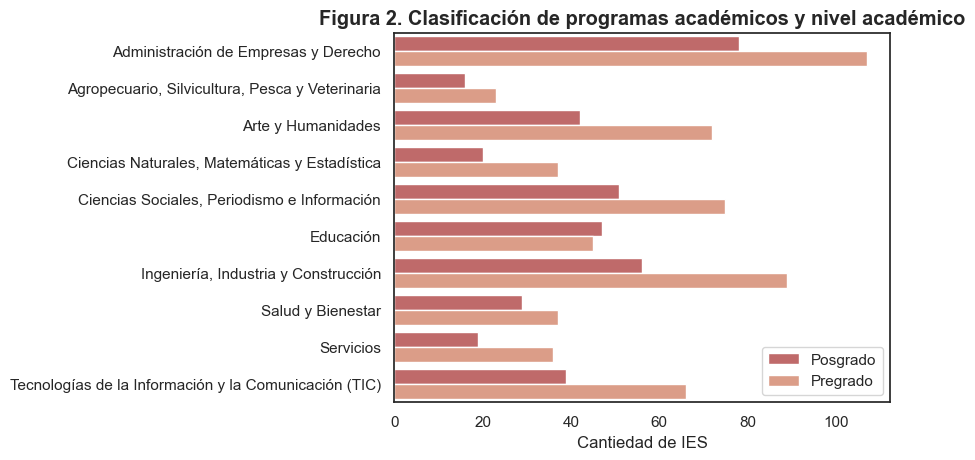

In [251]:
Pro=prog_B.groupby(['CINE_F_2013_AC_CAMPO_AMPLIO','NIVEL_ACADÉMICO'],as_index=False).agg({'CARÁCTER_ACADÉMICO':'count'})
nn=[]
for i in range(Pro.shape[0]):
    nn.append(len(prog_B[(prog_B['CINE_F_2013_AC_CAMPO_AMPLIO']==Pro['CINE_F_2013_AC_CAMPO_AMPLIO'][i])&(prog_B['NIVEL_ACADÉMICO']==Pro['NIVEL_ACADÉMICO'][i])]['NOMBRE_INSTITUCIÓN'].unique()))
area=pd.DataFrame({'Área de conocimiento':Pro['CINE_F_2013_AC_CAMPO_AMPLIO'],'Nivel academico':Pro['NIVEL_ACADÉMICO'],'IES':nn})
sns.barplot(area,x='IES',y='Área de conocimiento',hue=area['Nivel academico'],palette=['IndianRed','DarkSalmon'])
plt.xlabel('Cantiedad de IES')
plt.ylabel('Cantidad de programas').set_visible(False)
plt.title('Figura 2. Clasificación de programas académicos y nivel académico',weight= 'bold',size='large')
plt.legend()

5. Estudiantes matriculados y docentes

Text(0.5, 1.0, 'Figura 4. Docentes por género')

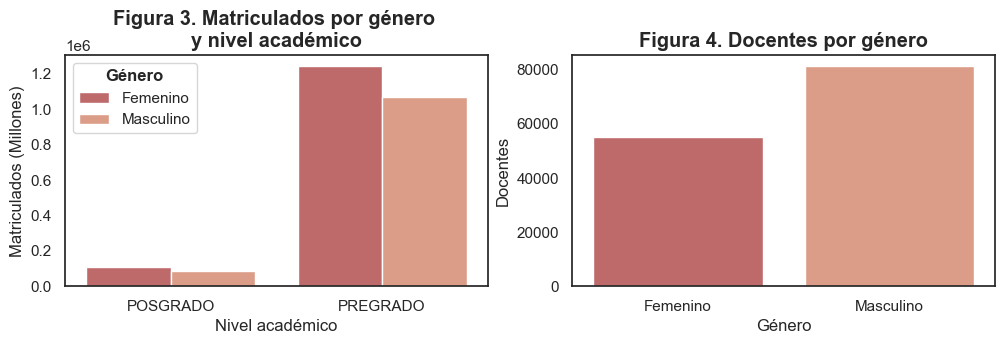

In [300]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.barplot(matriculados_b,x='NIVEL ACADÉMICO',y='MATRICULADOS',hue='SEXO',estimator='sum',errorbar=None,palette=['IndianRed','DarkSalmon'])
plt.xlabel('Nivel académico')
plt.ylabel('Matriculados (Millones)')
plt.title('Figura 3. Matriculados por género \ny nivel académico',weight= 'bold',size='large')
plt.legend(title='Género',title_fontproperties={'weight':'semibold'},loc=2)
plt.subplot(1,2,2)
sns.barplot(docentes_b,x='Sexo delDocente',y='No. de Docentes',estimator="sum",errorbar=None,palette=['IndianRed','DarkSalmon'])
plt.xlabel('Género')
plt.ylabel('Docentes')
plt.title('Figura 4. Docentes por género',weight= 'bold',size='large')

In [304]:
t=matriculados_b.MATRICULADOS.sum()
h=matriculados_b[matriculados_b['NIVEL ACADÉMICO']=='PREGRADO'].MATRICULADOS.sum()
P=matriculados_b[matriculados_b['NIVEL ACADÉMICO']=='POSGRADO'].MATRICULADOS.sum()

print(f'Hay {t} de alumnos matriculados, de los cuales el {round((h/t)*100,1)} estan en pregrado y {round((P/t)*100,1)} en posgrado')

Hay 2510314 de alumnos matriculados, de los cuales el 92.0 estan en pregrado y 8.0 en posgrado


In [312]:
mujeres=matriculados_b[matriculados_b['SEXO']=='Femenino'].MATRICULADOS.sum()
hombres=matriculados_b[matriculados_b['SEXO']=='Masculino'].MATRICULADOS.sum()

print(f'Por cada 5 mujeres hay {round((hombres/mujeres)*5)} hombres matriculados')

Por cada 5 mujeres hay 4 hombres matriculados


In [315]:
mujeres=docentes_b[docentes_b['Sexo delDocente']=='Femenino']['No. de Docentes'].sum()
hombres=docentes_b[docentes_b['Sexo delDocente']=='Masculino']['No. de Docentes'].sum()

print(f'Por cada 5 profesores hay {round((mujeres/hombres)*5)} profesoras')

Por cada 5 profesores hay 3 profesoras


In [317]:
estudiantes=matriculados_b.MATRICULADOS.sum()
profesores=docentes_b['No. de Docentes'].sum()

print(f'A cada docente le corresponde {round(estudiantes/profesores)} estudiantes')

A cada docente le corresponde 18 estudiantes


## 3. Cluster/ clasificación de IES

**Preparar dataset** esta base contiende todas las IES del pais para poder entrenar el modelo con mas datos
1. Docentes

In [718]:
docentes_C=pd.crosstab(docentes['Código de la Institución'],docentes['Sexo delDocente'],values=docentes['No. de Docentes'],aggfunc='sum')
docentes_C['docentes']=docentes_C.sum(axis=1)
docentes_C['doc_MH']=docentes_C.Femenino/docentes_C.Masculino
docentes_C=docentes_C[['docentes','doc_MH']]

2. Matriculados

In [719]:
matri=pd.crosstab(matriculados['CÓDIGO DE LA INSTITUCIÓN'],matriculados['SEXO'],values=matriculados['MATRICULADOS'],aggfunc='sum')
matri['matriculados']=matri.sum(axis=1)
matri['matri_MH']=matri.Femenino/matri.Masculino
matri=matri[['matriculados','matri_MH']]
matri=matri.merge(pd.crosstab(matriculados['CÓDIGO DE LA INSTITUCIÓN'],matriculados['NIVEL ACADÉMICO'],values=matriculados['MATRICULADOS'],aggfunc='sum').fillna(0),
                  how='inner',left_index=True,right_index=True)
matri.columns=['matriculados','matri_MH','matri_pre','matri_pos']

In [720]:
data=docentes_C.merge(matri,how='left',left_index=True,right_index=True)
data['matr_doc']=data.matriculados/data.docentes

3. Instituciones

In [721]:
IES_=IES[['CÓDIGO_INSTITUCIÓN','PROGRAMAS_EN_CONVENIO']].fillna(0)

4. Programas únicos

In [722]:
cod=[]
pre=[]
pos=[]
for i in prog['CÓDIGO_INSTITUCIÓN'].unique():
    cod.append(i)
    pr=prog[(prog['CÓDIGO_INSTITUCIÓN']==i)&(prog['NIVEL_ACADÉMICO']=='Pregrado')&(prog['ESTADO_PROGRAMA']=='Activo')]
    po=prog[(prog['CÓDIGO_INSTITUCIÓN']==i)&(prog['NIVEL_ACADÉMICO']=='Posgrado')&(prog['ESTADO_PROGRAMA']=='Activo')]
    if pr.shape[0]>0:
        pre.append(len(pr['NOMBRE_DEL_PROGRAMA'].unique()))
    else: pre.append(0)
    if po.shape[0]>0:
        pos.append(len(po['NOMBRE_DEL_PROGRAMA'].unique()))
    else: pos.append(0)

prog_d=pd.DataFrame({'CÓDIGO_INSTITUCIÓN':cod,'pregrados':pre,'posgrados':pos})

In [723]:
IES_=IES_.merge(prog_d,how='right',right_on='CÓDIGO_INSTITUCIÓN',left_on='CÓDIGO_INSTITUCIÓN')
IES_.index=IES_['CÓDIGO_INSTITUCIÓN']

In [724]:
data=IES_.merge(data,how='left',right_index=True,left_index=True).iloc[:,1:]
data.columns=['programas_convenio', 'pregrados', 'posgrados', 'docentes', 'doc_MH','matriculados', 'matri_MH', 'matri_pre', 'matri_pos', 'matr_doc']

5. Graduados

In [726]:
graduados=pd.read_excel('Graduados.xlsx')
gradu=pd.crosstab(graduados['CÓDIGO DE LA INSTITUCIÓN'],graduados['SEXO'],values=graduados['GRADUADOS'],aggfunc='sum')
gradu['graduados']=gradu.sum(axis=1)
gradu['gradu_MH']=gradu.Femenino/gradu.Masculino
gradu=gradu[['graduados','gradu_MH']]

In [727]:
data=data.merge(gradu,how='left',left_index=True,right_index=True)


6. Administrativos

In [694]:
admini=pd.read_excel('Administrativos.xlsx')
admin=admini.groupby('CÓDIGO DE LA INSTITUCIÓN').agg({'TOTAL':'sum'}).rename(columns={'TOTAL':'administrativos'})

In [695]:
data=data.merge(admin,how='left',left_index=True,right_index=True)

7. Admitidos

In [696]:
admitidos=pd.read_excel('Admitidos.xlsx')
admiti=pd.crosstab(admitidos['CÓDIGO DE LA INSTITUCIÓN'],admitidos['SEXO'],values=admitidos['ADMITIDOS'],aggfunc='sum')
admiti['admitidos']=admiti.sum(axis=1)
admiti['admiti_MH']=admiti.Femenino/admiti.Masculino
admiti=admiti[['admitidos','admiti_MH']]

In [697]:
data=data.merge(admiti,how='left',left_index=True,right_index=True)


8. Inscritos

In [698]:
inscritos=pd.read_excel('Inscritos.xlsx')
insc=pd.crosstab(inscritos['CÓDIGO DE LA INSTITUCIÓN'],inscritos['SEXO'],values=inscritos['INSCRITOS'],aggfunc='sum')
insc['inscritos']=insc.sum(axis=1)
insc['insc_MH']=insc.Femenino/insc.Masculino
insc=insc[['inscritos','insc_MH']]

In [699]:
data=data.merge(insc,how='left',left_index=True,right_index=True)

9. Primer curso

In [700]:
primer=pd.read_excel('Primer.xlsx')
pric=pd.crosstab(primer['CÓDIGO DE LA INSTITUCIÓN'],primer['SEXO'],values=primer['PRIMER CURSO'],aggfunc='sum')
pric['primer_curso']=insc.sum(axis=1)
pric['pric_MH']=pric.Femenino/pric.Masculino
pric=pric[['primer_curso','pric_MH']]

Dataset final

In [701]:
data=data.merge(pric,how='left',left_index=True,right_index=True)

Calcula la tasa de graduación:

In [702]:
data['TG']=data.graduados/data.primer_curso

Guarda la base final

In [703]:
data.to_excel('IES_data.xlsx')

In [3]:
data=pd.read_excel('IES_data.xlsx')

Cargan las librerias

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV


El modelo no hacepta datos faltantes, por ende se utiliza un algoritmo de KNN para imputar a los valores faltantes un valor de acuerdo a las IES mas cercanas.

In [5]:
X=data[[ 'docentes', 'doc_MH',
       'matriculados', 'matri_MH', 'matri_pre', 'matri_pos', 'matr_doc',
       'graduados', 'gradu_MH', 'administrativos', 'admitidos', 'admiti_MH',
       'inscritos', 'insc_MH', 'primer_curso', 'pric_MH', 'TG']]

Modelo

In [6]:
imputer=KNNImputer(n_neighbors=8,weights='uniform')
# imputer=SimpleImputer(missing_values=pd.NA,strategy='mean')
imputer.fit(X)

KNNImputer(n_neighbors=8)

Crea dataset con los datos provenientes del modelo

In [7]:
dato=pd.DataFrame(imputer.transform(X))
dato.columns=['docentes', 'doc_MH',
       'matriculados', 'matri_MH', 'matri_pre', 'matri_pos', 'matr_doc',
       'graduados', 'gradu_MH', 'administrativos', 'admitidos', 'admiti_MH',
       'inscritos', 'insc_MH', 'primer_curso', 'pric_MH', 'TG']

In [8]:
data=data.iloc[:,0:4].merge(dato,how='left',right_index=True,left_index=True)

Rescala los datos

In [9]:
variables=MinMaxScaler().fit_transform(data.iloc[:,1:])

Crea el modelo de Kmeans

In [18]:
clus=KMeans(n_clusters=3)
clus.fit(variables)
grupo=clus.predict(variables)

c:\Users\juank\miniconda3\envs\Analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juank\miniconda3\envs\Analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Calcula el cluster de cada institución 

In [19]:
data['cluster']=grupo
data['cluster']=data.cluster.replace(2,3)
data['cluster']=data.cluster.replace(1,2)
data['cluster']=data.cluster.replace(0,1)

Calcular los centroides de cada grupo

In [20]:
centroides=clus.cluster_centers_

centro=pd.DataFrame(centroides,columns=data.columns[1:-1])
centro.index=[1,2,3]

data1=centro[['programas_convenio', 'pregrados', 'posgrados']]
data2=centro[['docentes','matriculados','graduados','administrativos','admitidos','inscritos','primer_curso', 'matr_doc']]
data3=centro[[ 'matri_MH', 'gradu_MH',  'admiti_MH','insc_MH',  'pric_MH', 'TG']]

Gráfica de las caracteristicas por cada cluster

c:\Users\juank\miniconda3\envs\Analytics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\juank\miniconda3\envs\Analytics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\juank\miniconda3\envs\Analytics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\juank\miniconda3\envs\Analytics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

Text(0.5, 1.0, 'Indicadores')

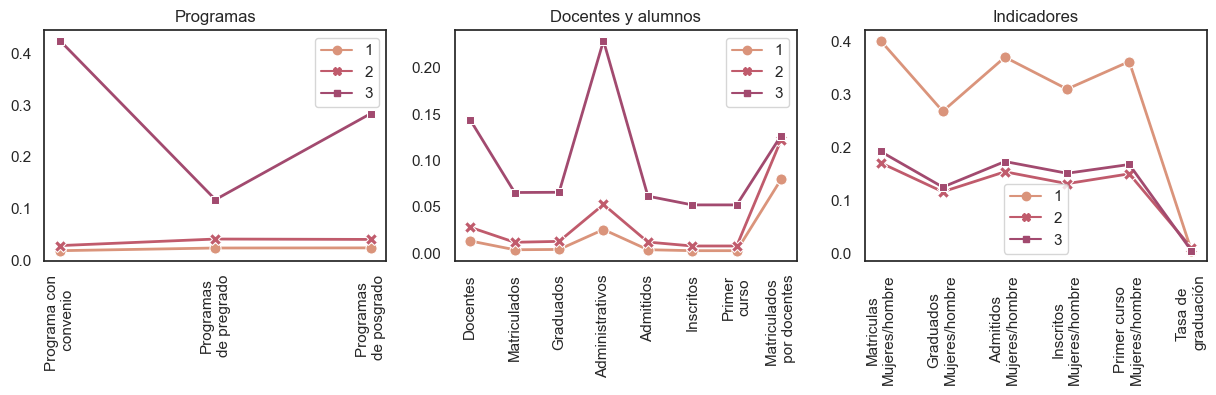

In [23]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(data=data1.transpose(),dashes=False,markers=True,markersize=8,palette=['#DA947B','#C05B6C','#A24A6F'],linewidth=2)
plt.xticks([0,1,2],['Programa con\n convenio','Programas\nde pregrado','Programas \nde posgrado'], rotation=90)
plt.title('Programas')

plt.subplot(1,3,2)
sns.lineplot(data=data2.transpose(),dashes=False,markers=True,markersize=8,palette=['#DA947B','#C05B6C','#A24A6F'],linewidth=2)
plt.xticks([0,1,2,3,4,5,6,7],['Docentes','Matriculados','Graduados','Administrativos','Admitidos','Inscritos','Primer\ncurso','Matriculados \n por docentes'], rotation=90)
plt.title('Docentes y alumnos')
# plt.title('Figura 3. Características por grupo de IES',weight= 'bold',size='large')
# plt.title('Figura 1. Último año alcanzado por edad y sexo',weight= 'bold',size='large')

plt.subplot(1,3,3)
sns.lineplot(data=data3.transpose(),dashes=False,markers=True,markersize=8,palette=['#DA947B','#C05B6C','#A24A6F'],linewidth=2)
plt.xticks([0,1,2,3,4,5],['Matriculas\nMujeres/hombre','Graduados\nMujeres/hombre','Admitidos\nMujeres/hombre','Inscritos\nMujeres/hombre','Primer curso\nMujeres/hombre','Tasa de \ngraduación'], rotation=90)
plt.title('Indicadores')

In [1178]:
from joblib import dump

dump(clus, 'clasificación.joblib') 

['clasificación.joblib']

Se filtran las IES de Bogotá

In [1167]:
data_B=data.iloc[ies_index(ies,data,'CÓDIGO_INSTITUCIÓN'),:]

Porcentaje de IES en cada cluster

In [1180]:
cluster=data_B.groupby('cluster').agg({'cluster':'count'})
cluster=(cluster.cluster/cluster.cluster.sum())*100
cluster

cluster
1    17.213115
2    64.754098
3    18.032787
Name: cluster, dtype: float64

Caracteristicas por cluster

In [1169]:
data_B[data_B.cluster==1].iloc[:,1:].mean()

programas_convenio       0.190476
pregrados                6.190476
posgrados                6.666667
docentes               271.726190
doc_MH                   1.248892
matriculados          2086.815476
matri_MH                 2.368700
matri_pre              359.880952
matri_pos             1726.934524
matr_doc                 8.367883
graduados              266.107143
gradu_MH                 3.419337
administrativos        142.398810
admitidos              579.880952
admiti_MH                2.380186
inscritos             1062.476190
insc_MH                  2.162532
primer_curso          1068.416494
pric_MH                  2.322941
TG                       0.383815
cluster                  1.000000
dtype: float64

In [1170]:
data_B[data_B.cluster==2].iloc[:,1:].mean()

programas_convenio       0.329114
pregrados               13.392405
posgrados                7.443038
docentes               526.170944
doc_MH                   0.583712
matriculados          7856.755248
matri_MH                 1.013670
matri_pre              763.595015
matri_pos             7093.160234
matr_doc                15.269816
graduados             1010.368790
gradu_MH                 1.289130
administrativos        326.823439
admitidos             2485.143437
admiti_MH                1.048751
inscritos             3267.046877
insc_MH                  1.010345
primer_curso          3271.088998
pric_MH                  1.007143
TG                       0.493781
cluster                  2.000000
dtype: float64

In [1171]:
data_B[data_B.cluster==3].iloc[:,1:].mean()

programas_convenio        4.409091
pregrados                45.227273
posgrados                73.590909
docentes               4342.181818
doc_MH                    0.681265
matriculados          88118.954545
matri_MH                  1.219331
matri_pre              6324.227273
matri_pos             81794.727273
matr_doc                 19.528296
graduados             10080.454545
gradu_MH                  1.424624
administrativos        2199.488636
admitidos             23218.181818
admiti_MH                 1.210068
inscritos             41496.863636
insc_MH                   1.171645
primer_curso          41498.035282
pric_MH                   1.172972
TG                        0.382386
cluster                   3.000000
dtype: float64

Filtra por Bogotá

In [1187]:
cluster=data_B.iloc[:,[0,-1]]
segm=IES_B.merge(cluster,'left',left_on='CÓDIGO_INSTITUCIÓN',right_on='CÓDIGO_INSTITUCIÓN')

Gráfica

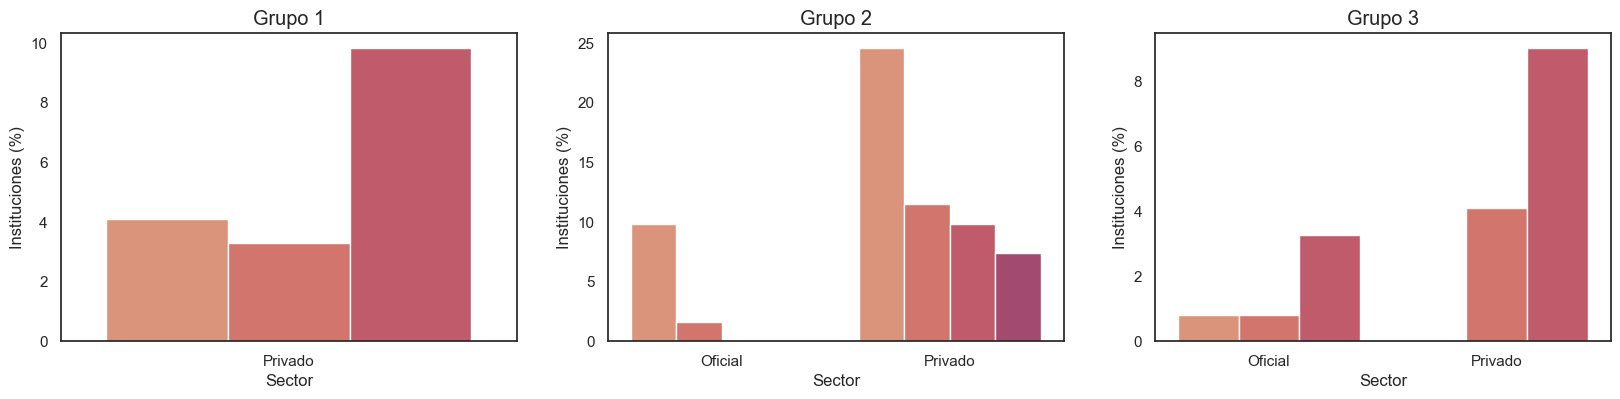

In [1214]:
plt.figure(figsize=(20,4))
for i in [1,2,3]:
    sec=segm[segm.cluster==i]
    sect=sec.groupby(['SECTOR','CARÁCTER_ACADÉMICO'],as_index=False).agg({'CÓDIGO_INSTITUCIÓN':'count'})
    sect['Porcentaje']=(sect['CÓDIGO_INSTITUCIÓN']/N_ies)*100
    plt.subplot(1,3,i)
    sns.barplot(sect,x='SECTOR',y='Porcentaje',hue=sect['CARÁCTER_ACADÉMICO'],palette=sns.color_palette("flare"))
    plt.xlabel('Sector')
    plt.ylabel('Instituciones (%)')
    plt.title(f'Grupo {i}',size='large')
    # if i ==2:plt.title(f'Figura 4. IES por clasificación y segun su sector y carácter académico',weight= 'bold',size='large')
    # plt.legend(title='Caracter académico',title_fontproperties={'weight':'semibold'},loc=2)
    
    plt.legend('').set_visible(False)

Cluster por sector

In [1212]:
pd.crosstab(segm['SECTOR'],segm['cluster'],normalize='columns',margins=True,margins_name='Total')

cluster,1,2,3,Total
SECTOR,,,,
Oficial,0.0,0.177215,0.272727,0.163934
Privado,1.0,0.822785,0.727273,0.836066


Cluster por carácter académico

In [1215]:
pd.crosstab(segm['CARÁCTER_ACADÉMICO'],segm['cluster'],normalize='columns',margins=True,margins_name='Total')

cluster,1,2,3,Total
CARÁCTER_ACADÉMICO,,,,
Institución Tecnológica,0.238095,0.151899,0.045455,0.147541
Institución Técnica Profesional,0.190476,0.113924,0.000000,0.106557
Institución Universitaria/Escuela Tecnológica,0.571429,0.531646,0.272727,0.491803
Universidad,0.000000,0.202532,0.681818,0.254098


In [ ]:
# from joblib import load
# regression_model = load('regression.joblib')